In [478]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [479]:
#Importing given data set from local system
df= pd.read_csv(r"C:\Users\16479\Downloads\conversion_data.csv")

In [480]:
df.head(5)

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [482]:
df.describe(include='all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [483]:
##df['converted_Fri']=df['converted_Fri'].astype(int)

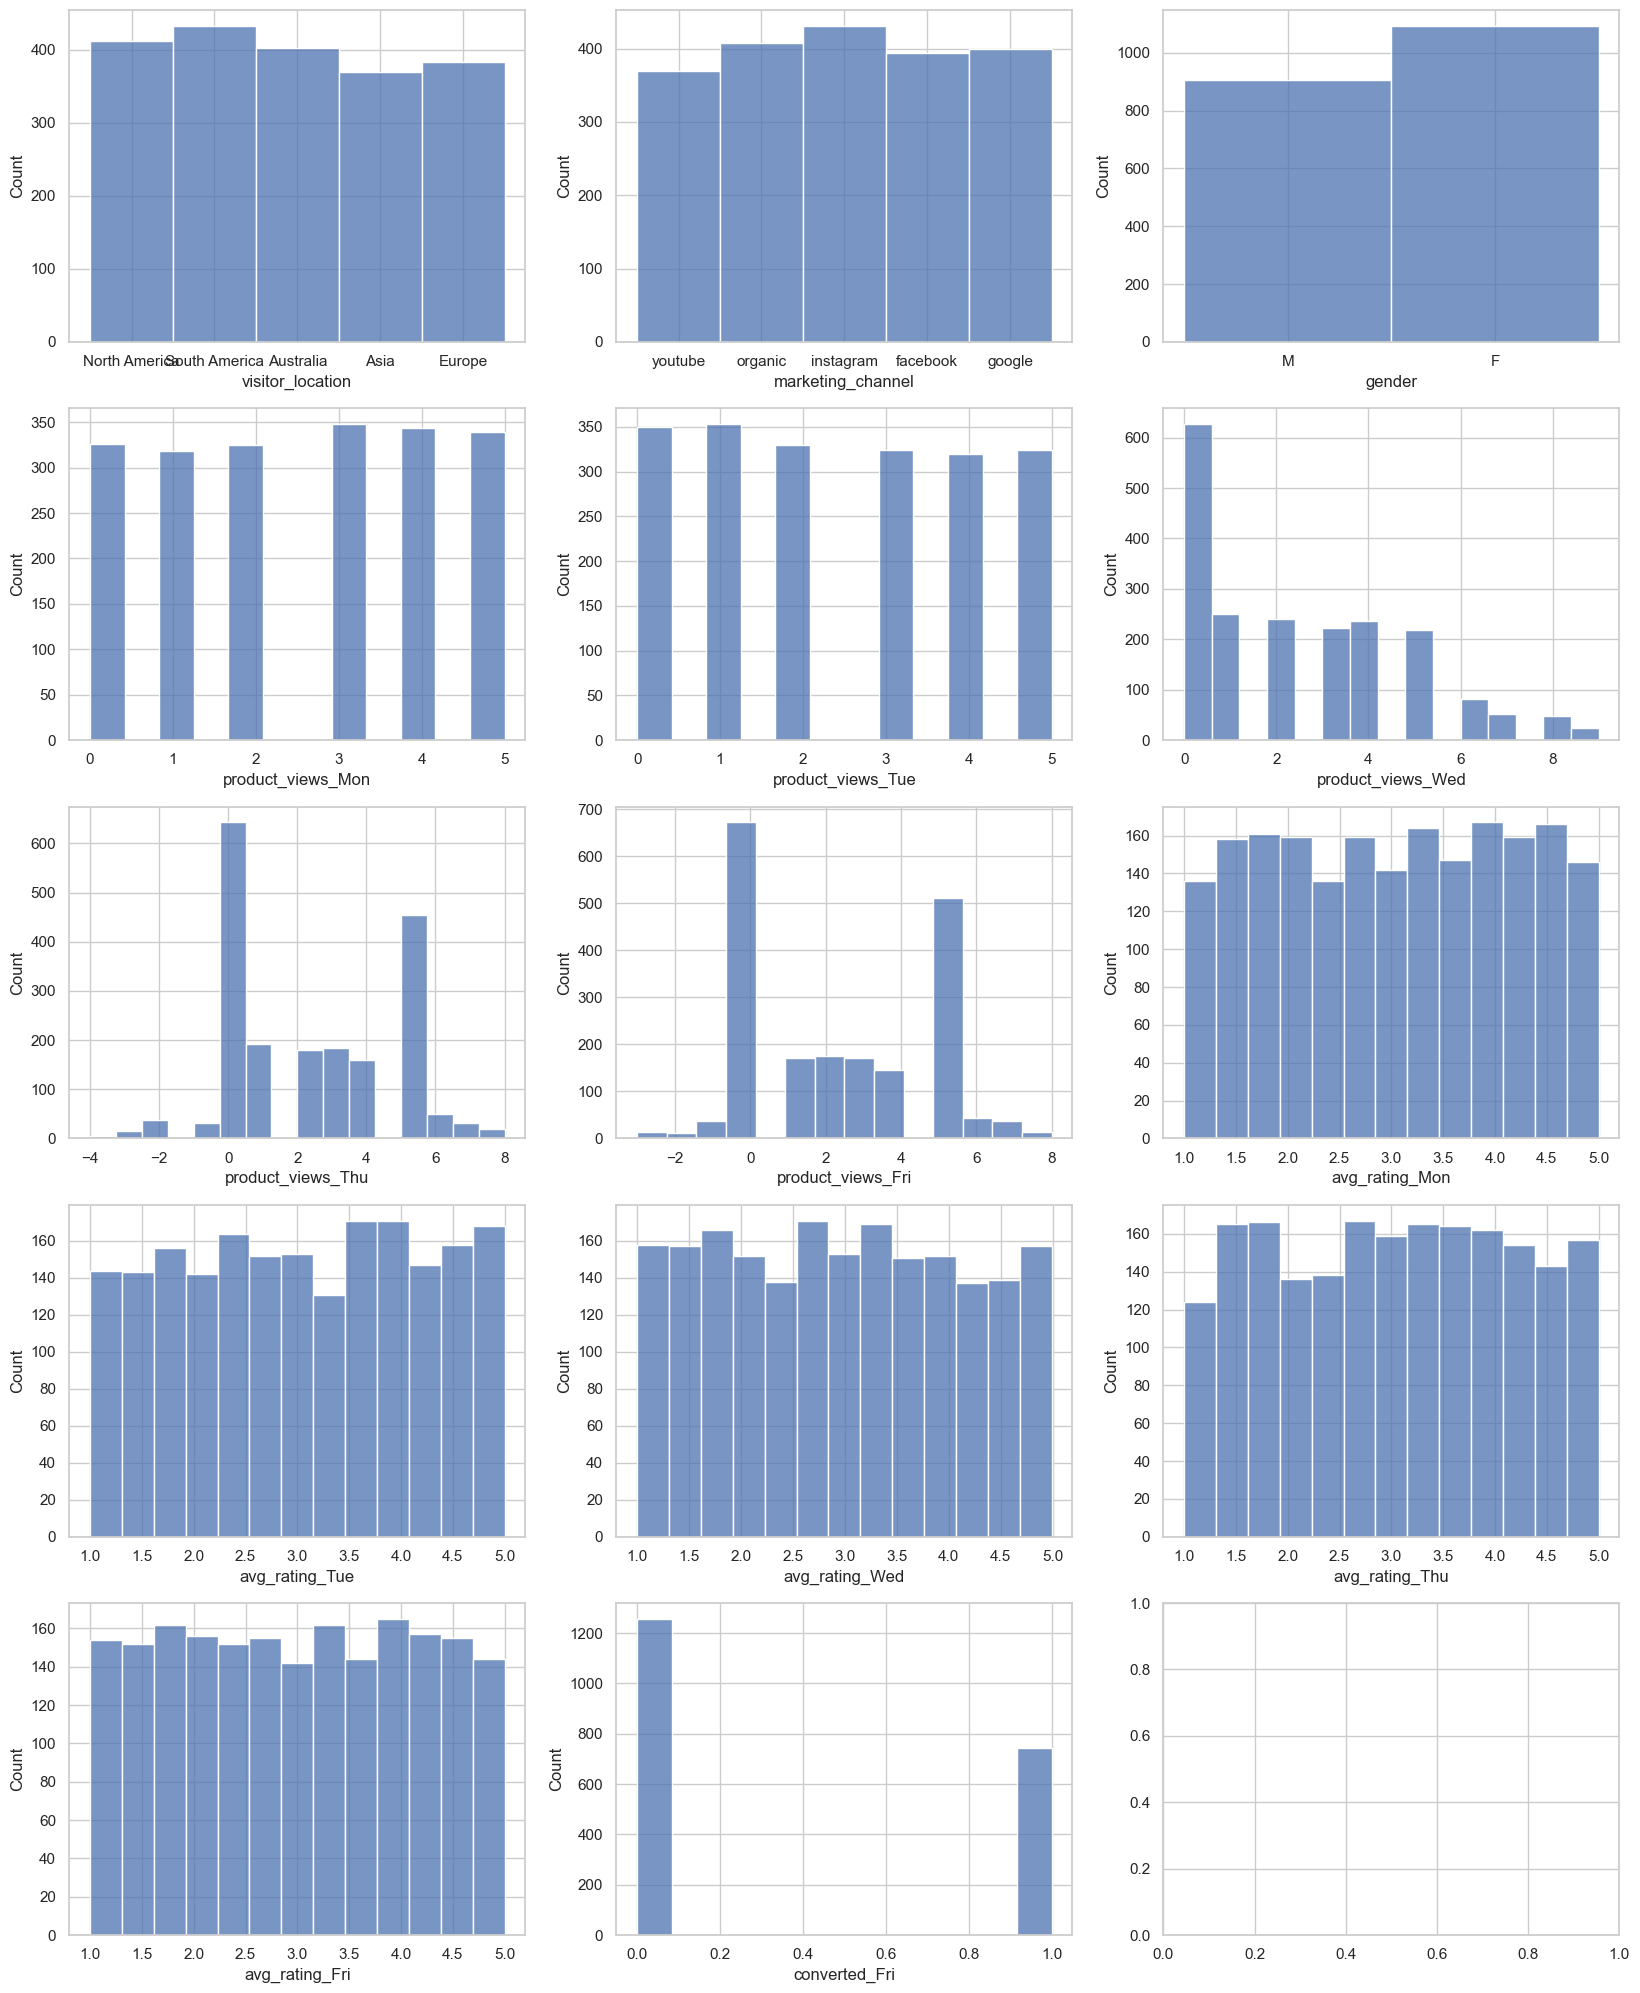

In [484]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14 , _)) = plt.subplots(5, 3, figsize=(20, 25))

sns.histplot(df['visitor_location'], ax=ax1)
sns.histplot(df['marketing_channel'], ax=ax2)
sns.histplot(df['gender'], ax=ax3)
sns.histplot(df['product_views_Mon'], ax=ax4)
sns.histplot(df['product_views_Tue'], ax=ax5)
sns.histplot(df['product_views_Wed'], ax=ax6)
sns.histplot(df['product_views_Thu'], ax=ax7)
sns.histplot(df['product_views_Fri'], ax=ax8)
sns.histplot(df['avg_rating_Mon'], ax=ax9)
sns.histplot(df['avg_rating_Tue'], ax=ax10)
sns.histplot(df['avg_rating_Wed'], ax=ax11)
sns.histplot(df['avg_rating_Thu'], ax=ax12)
sns.histplot(df['avg_rating_Fri'], ax=ax13)
sns.histplot(df['converted_Fri'], ax =ax14)

plt.show()

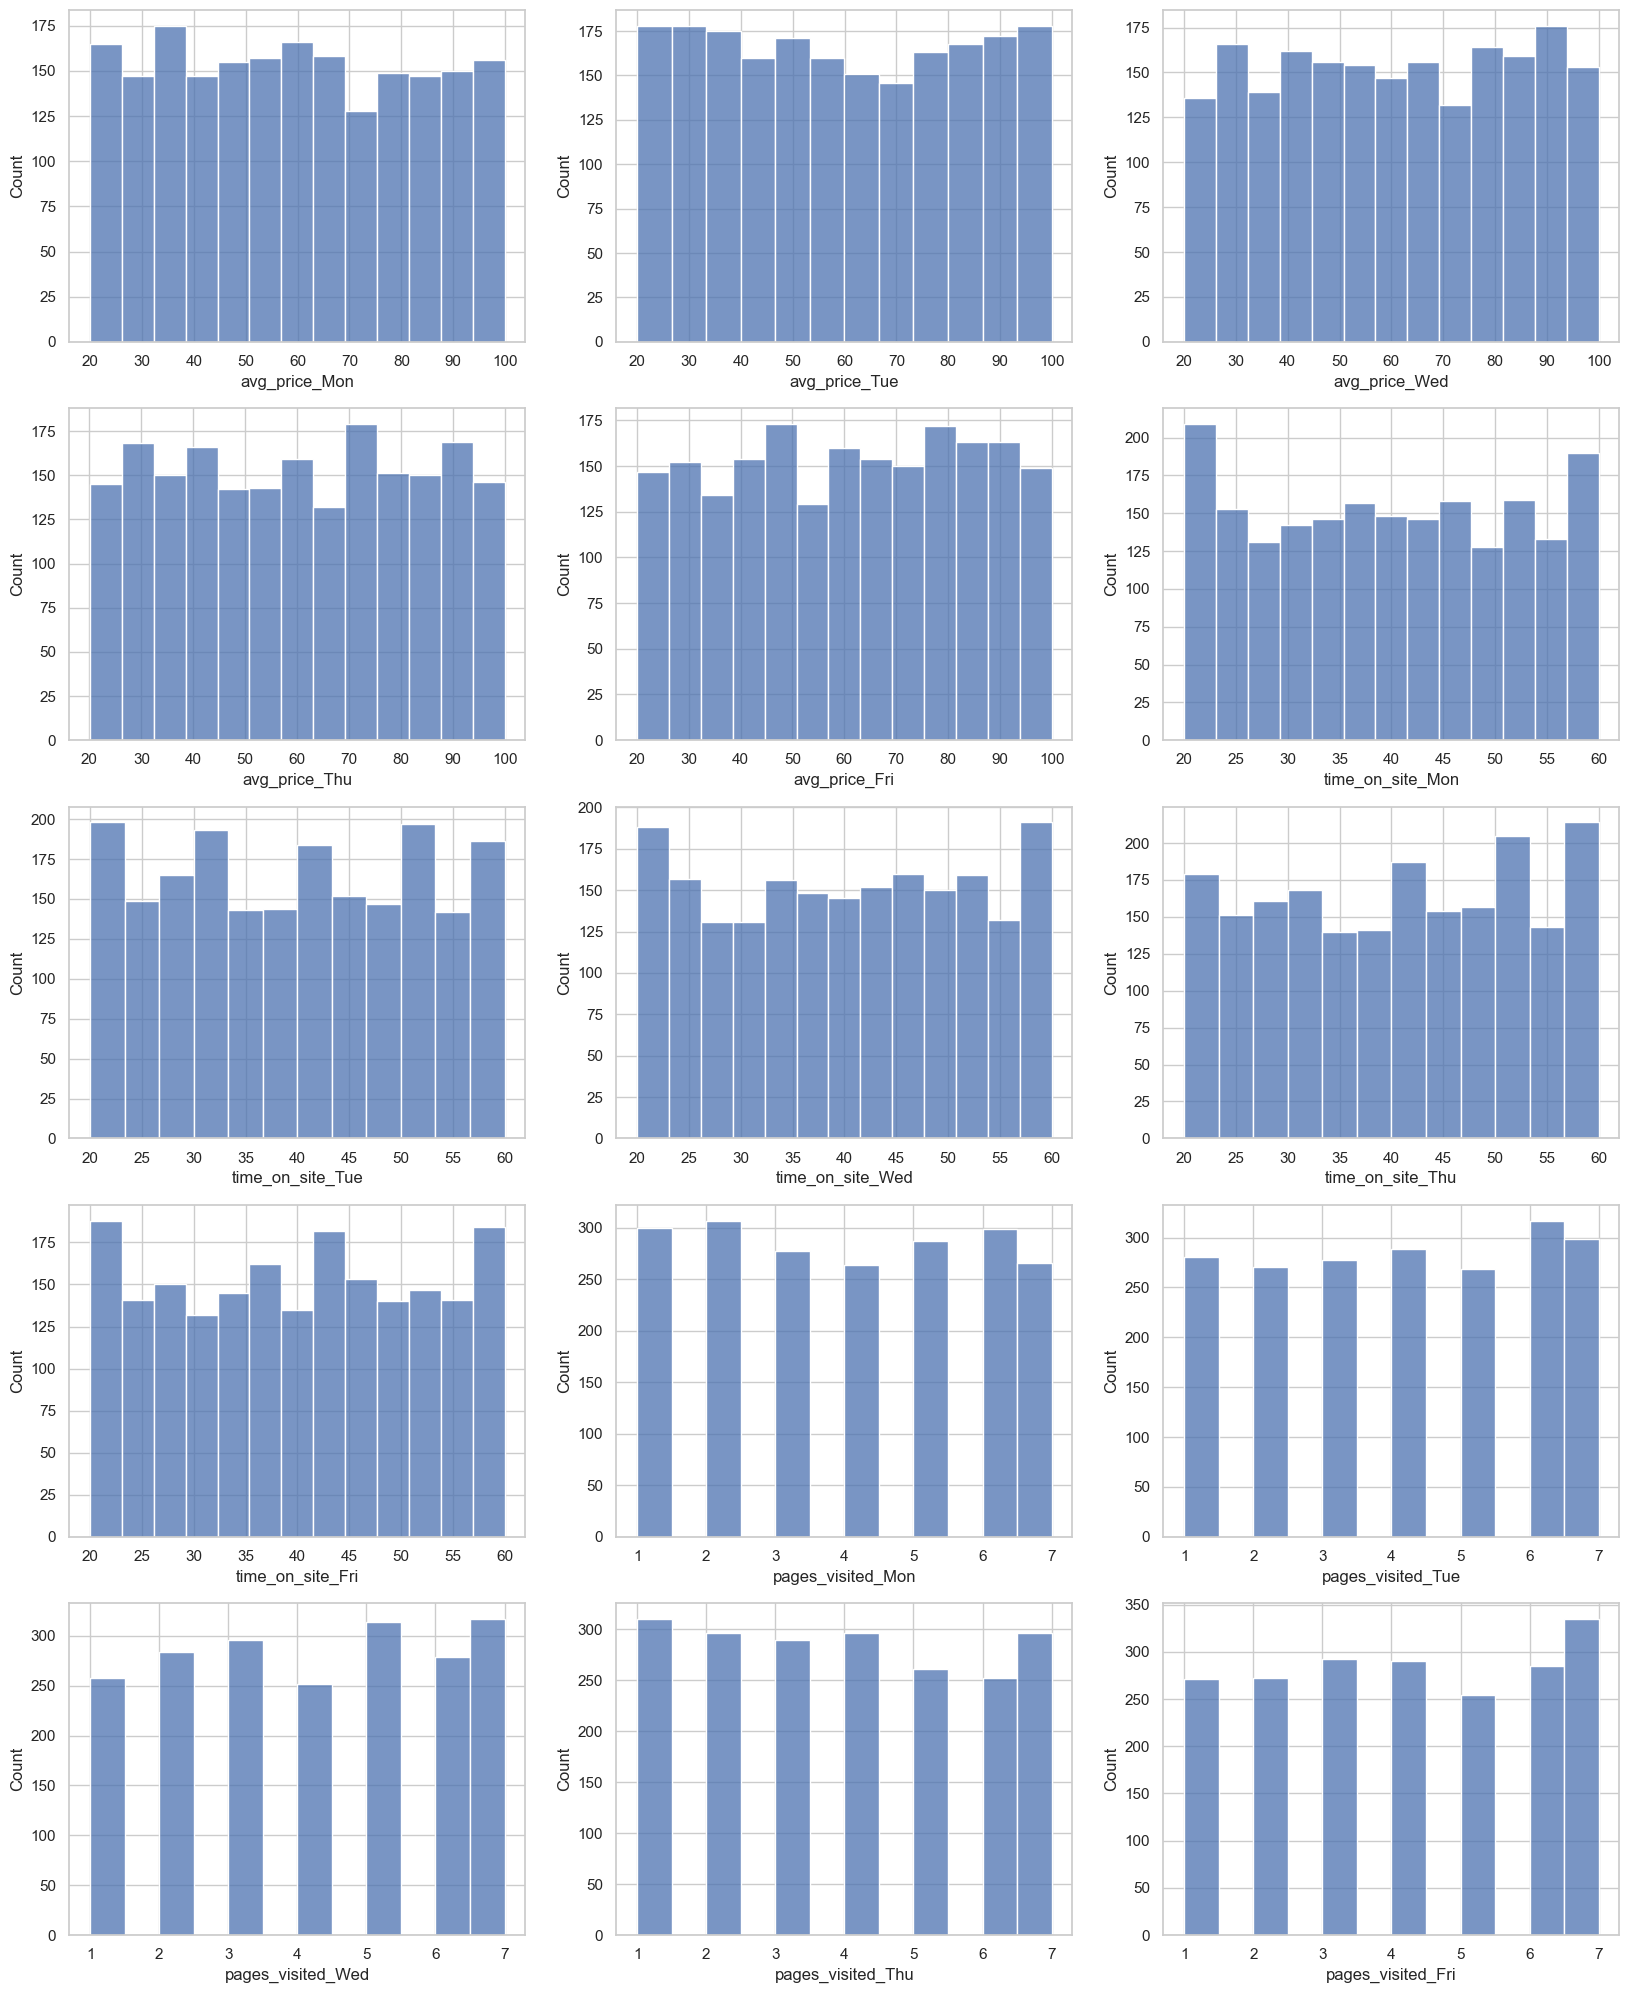

In [485]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14 , ax15)) = plt.subplots(5, 3, figsize=(20, 25))

sns.histplot(df['avg_price_Mon'], ax=ax1)
sns.histplot(df['avg_price_Tue'], ax=ax2)
sns.histplot(df['avg_price_Wed'], ax=ax3)
sns.histplot(df['avg_price_Thu'], ax=ax4)
sns.histplot(df['avg_price_Fri'], ax=ax5)
sns.histplot(df['time_on_site_Mon'], ax=ax6)
sns.histplot(df['time_on_site_Tue'], ax=ax7)
sns.histplot(df['time_on_site_Wed'], ax=ax8)
sns.histplot(df['time_on_site_Thu'], ax=ax9)
sns.histplot(df['time_on_site_Fri'], ax=ax10)
sns.histplot(df['pages_visited_Mon'], ax=ax11)
sns.histplot(df['pages_visited_Tue'], ax=ax12)
sns.histplot(df['pages_visited_Wed'], ax=ax13)
sns.histplot(df['pages_visited_Thu'], ax =ax14)
sns.histplot(df['pages_visited_Fri'], ax =ax15)

plt.show()

In [486]:
df['product_views_Thu'] = df['product_views_Thu'].abs()
df['product_views_Fri'] = df['product_views_Fri'].abs()

In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [488]:
df.describe(include='int')

,Unnamed: 0,visitor_id,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,time_on_site_Mon,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,1000.500000,2.541500,2.440500,2.441000,2.425500,2.451000,39.783500,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,1.704914,1.715206,2.343345,2.197695,2.233628,11.819707,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,1.000000,1.000000,0.000000,0.000000,0.000000,30.000000,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,3.000000,2.000000,2.000000,2.000000,2.000000,40.000000,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,4.000000,4.000000,4.000000,5.000000,5.000000,50.000000,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000
max,1999.000000,2000.000000,5.000000,5.000000,9.000000,8.000000,8.000000,60.000000,60.000000,60.000000,60.000000,60.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000


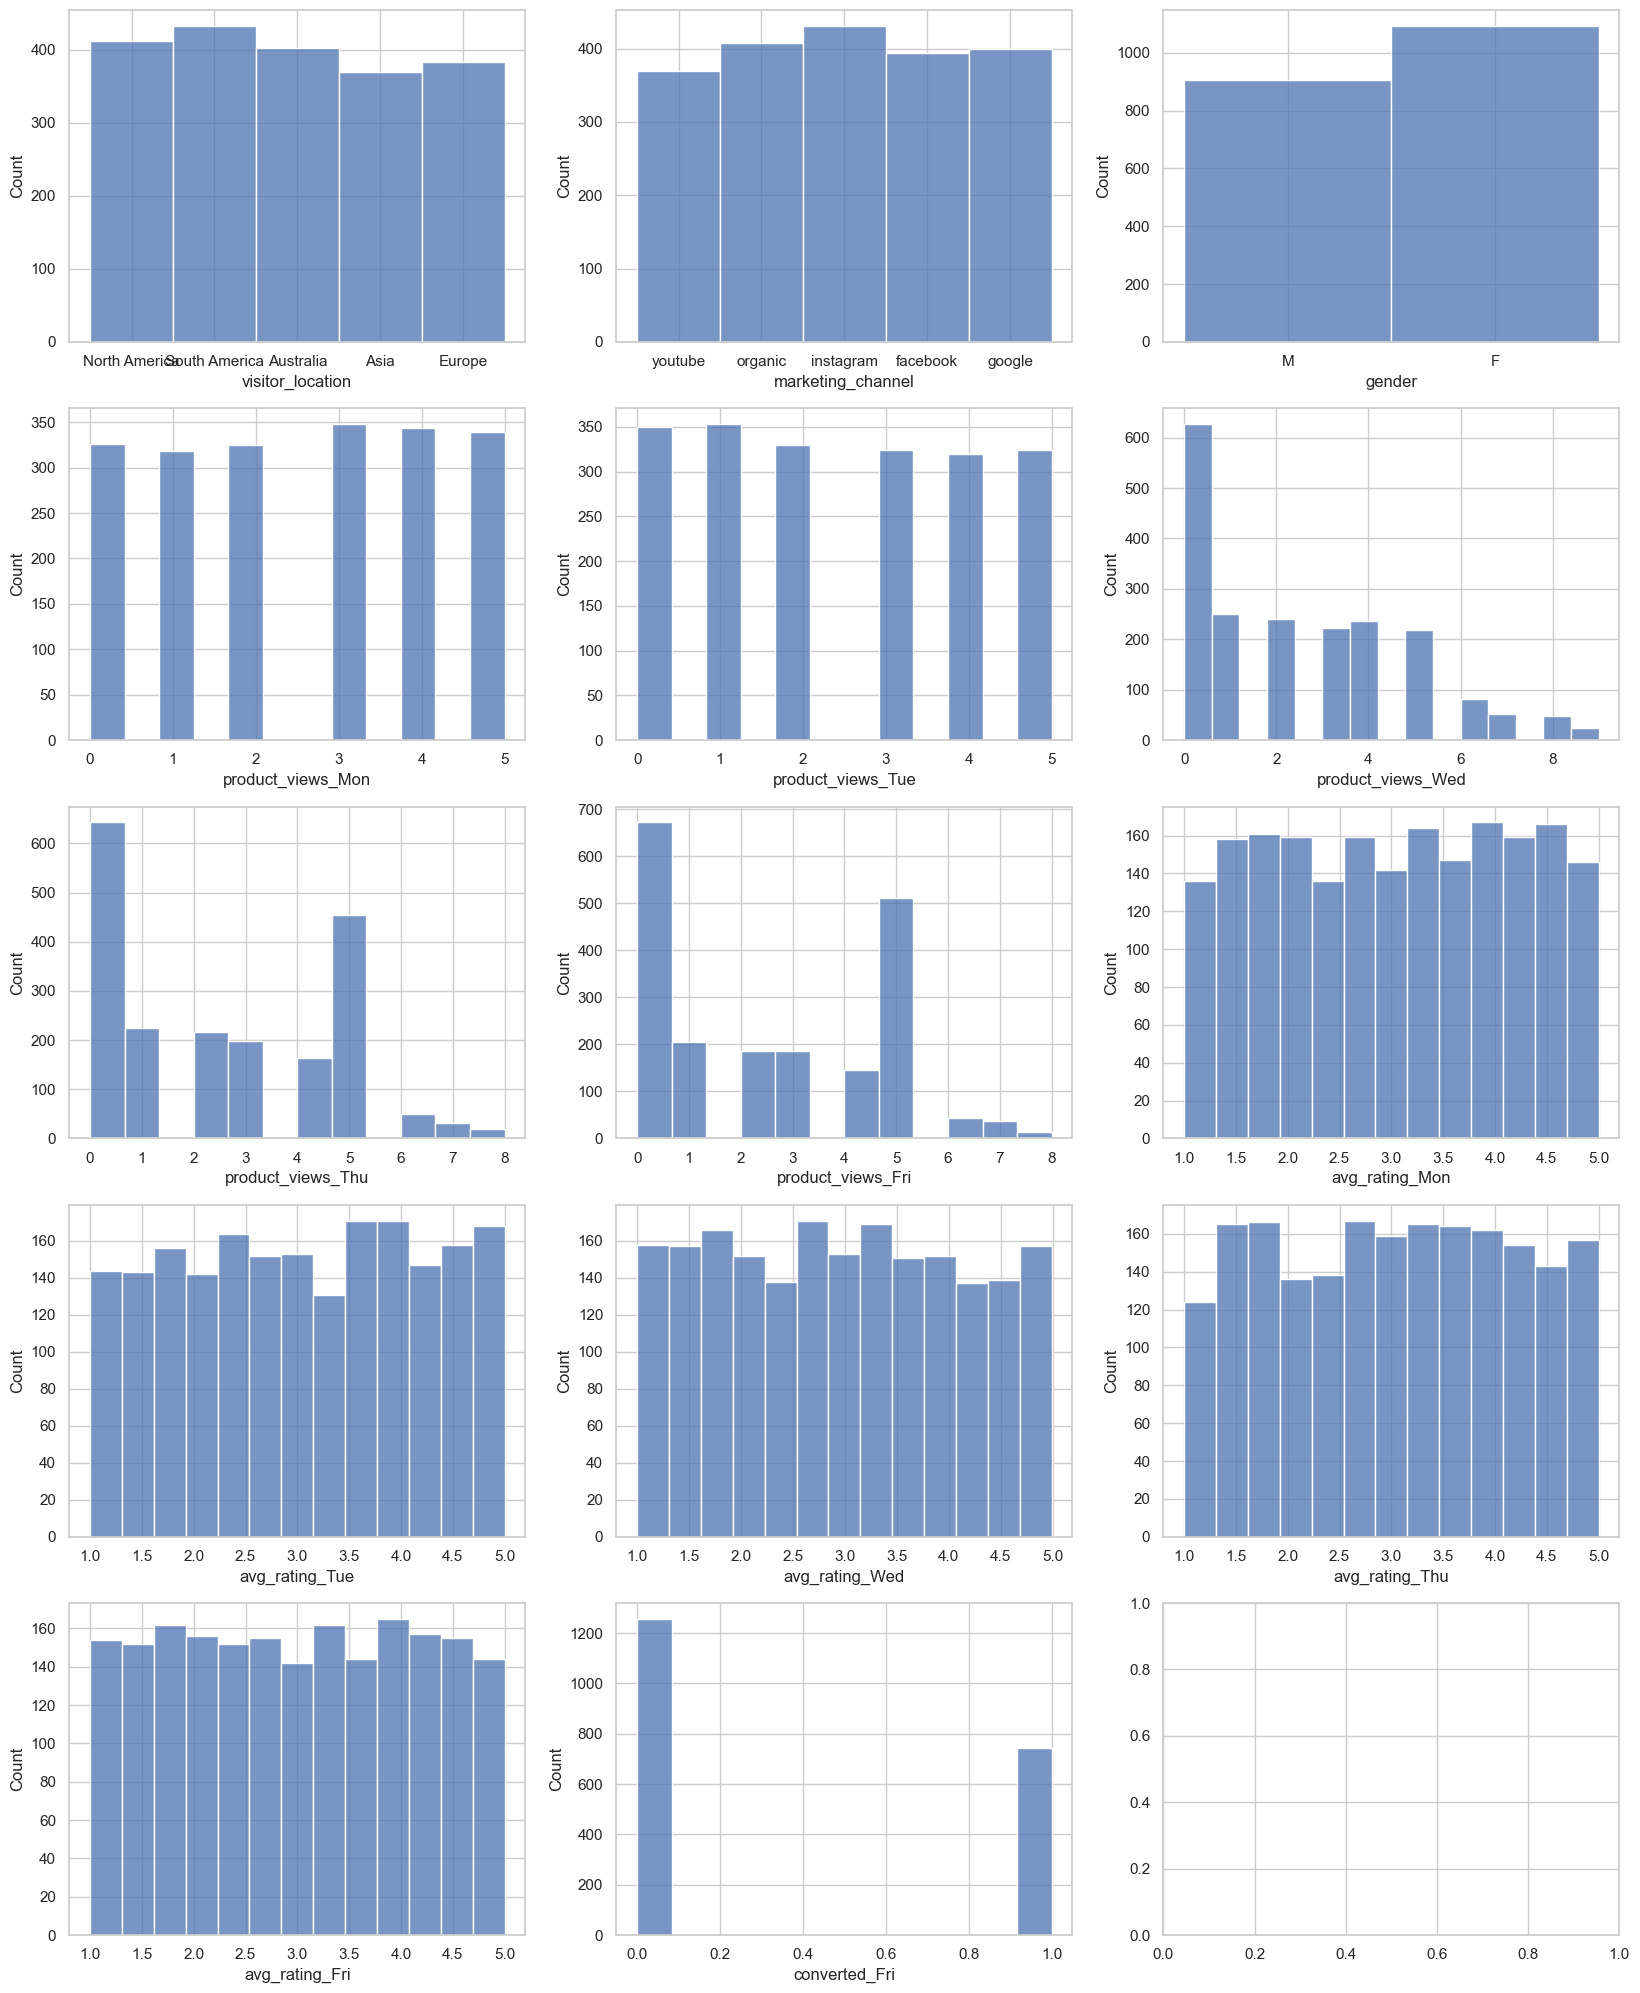

In [489]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14 , _)) = plt.subplots(5, 3, figsize=(20, 25))

sns.histplot(df['visitor_location'], ax=ax1)
sns.histplot(df['marketing_channel'], ax=ax2)
sns.histplot(df['gender'], ax=ax3)
sns.histplot(df['product_views_Mon'], ax=ax4)
sns.histplot(df['product_views_Tue'], ax=ax5)
sns.histplot(df['product_views_Wed'], ax=ax6)
sns.histplot(df['product_views_Thu'], ax=ax7)
sns.histplot(df['product_views_Fri'], ax=ax8)
sns.histplot(df['avg_rating_Mon'], ax=ax9)
sns.histplot(df['avg_rating_Tue'], ax=ax10)
sns.histplot(df['avg_rating_Wed'], ax=ax11)
sns.histplot(df['avg_rating_Thu'], ax=ax12)
sns.histplot(df['avg_rating_Fri'], ax=ax13)
sns.histplot(df['converted_Fri'], ax =ax14)

plt.show()

In [490]:
df['Product_Views_Week']= (df['product_views_Mon']+df['product_views_Tue']+df['product_views_Wed']+df['product_views_Thu']+df['product_views_Fri'])/5

In [491]:
location_dummies = pd.get_dummies(df['visitor_location'])
df = pd.concat([df,location_dummies], axis=1)
location_dummies.head(5)

,Asia,Australia,Europe,North America,South America
0,False,False,False,True,False
1,False,False,False,False,True
2,False,True,False,False,False
3,False,False,False,True,False
4,True,False,False,False,False


In [492]:
gender_dummies = pd.get_dummies(df['gender'])
df = pd.concat([df,gender_dummies], axis=1)

In [493]:
marketing_dummies = pd.get_dummies(df['marketing_channel'])
df = pd.concat([df,marketing_dummies], axis=1)

In [494]:
df.columns

Index(['Unnamed: 0', 'visitor_id', 'visitor_location', 'marketing_channel',
       'gender', 'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri',
       'Product_Views_Week', 'Asia', 'Australia', 'Europe', 'North America',
       'South America', 'F', 'M', 'facebook', 'google', 'instagram', 'organic',
       'youtube'],
      dtype='object')

In [495]:
df.head(5)

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,Europe,North America,South America,F,M,facebook,google,instagram,organic,youtube
0,0,1,North America,youtube,M,4,5,2,1,2,...,False,True,False,False,True,False,False,False,False,True
1,1,2,South America,organic,F,2,5,0,1,5,...,False,False,True,True,False,False,False,False,True,False
2,2,3,Australia,instagram,M,3,4,0,3,5,...,False,False,False,False,True,False,False,True,False,False
3,3,4,North America,facebook,M,1,0,0,5,0,...,False,True,False,False,True,True,False,False,False,False
4,4,5,Asia,instagram,F,1,5,2,2,3,...,False,False,False,True,False,False,False,True,False,False


In [496]:
df['Asia'] = df['Asia'].astype(int) 
df['Australia'] = df['Australia'].astype(int) 
df['North America'] = df['North America'].astype(int) 
df['Europe'] = df['Europe'].astype(int) 
df['South America'] = df['South America'].astype(int) 
df['F'] = df['F'].astype(int) 
df['M'] = df['M'].astype(int) 
df['facebook'] = df['facebook'].astype(int) 
df['google'] = df['google'].astype(int) 
df['instagram'] = df['instagram'].astype(int) 
df['organic'] = df['organic'].astype(int) 
df['youtube'] = df['youtube'].astype(int) 

In [497]:
df.head(5)

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,Europe,North America,South America,F,M,facebook,google,instagram,organic,youtube
0,0,1,North America,youtube,M,4,5,2,1,2,...,0,1,0,0,1,0,0,0,0,1
1,1,2,South America,organic,F,2,5,0,1,5,...,0,0,1,1,0,0,0,0,1,0
2,2,3,Australia,instagram,M,3,4,0,3,5,...,0,0,0,0,1,0,0,1,0,0
3,3,4,North America,facebook,M,1,0,0,5,0,...,0,1,0,0,1,1,0,0,0,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,0,0,0,1,0,0,0,1,0,0


<Axes: xlabel='visitor_location', ylabel='count'>

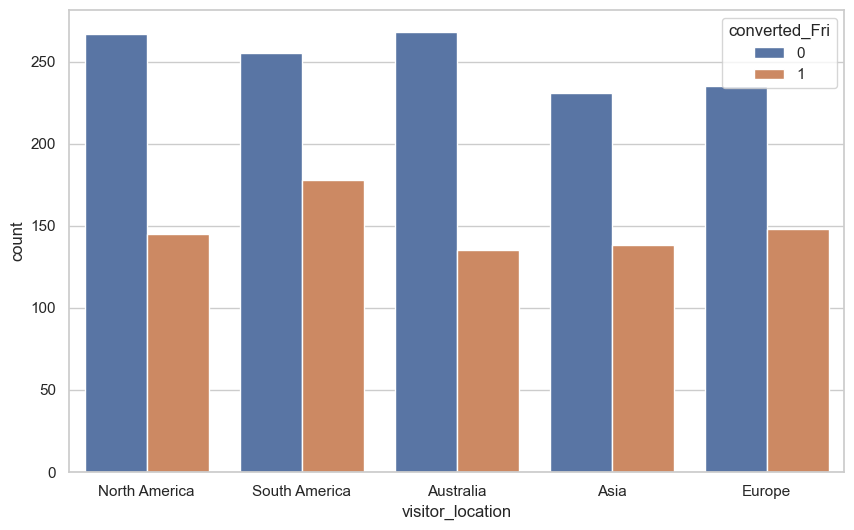

In [498]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='visitor_location', hue='converted_Fri')

<Axes: xlabel='gender', ylabel='count'>

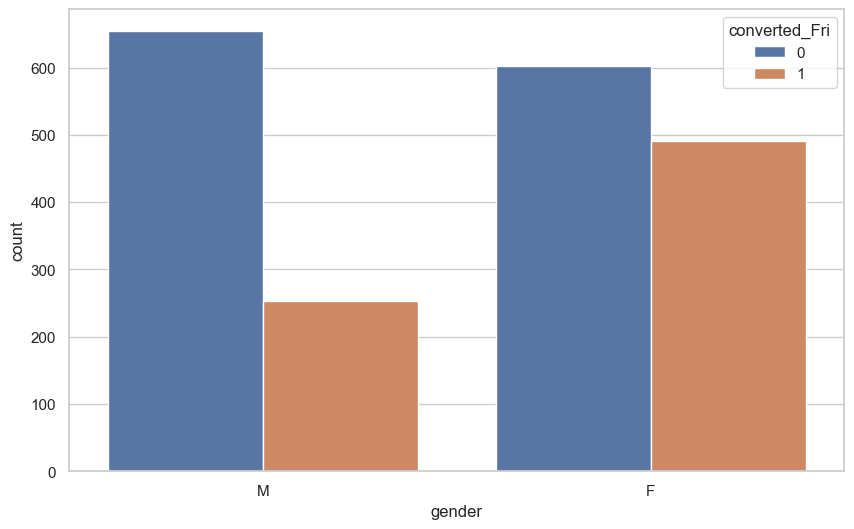

In [499]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', hue='converted_Fri')

<Axes: xlabel='marketing_channel', ylabel='count'>

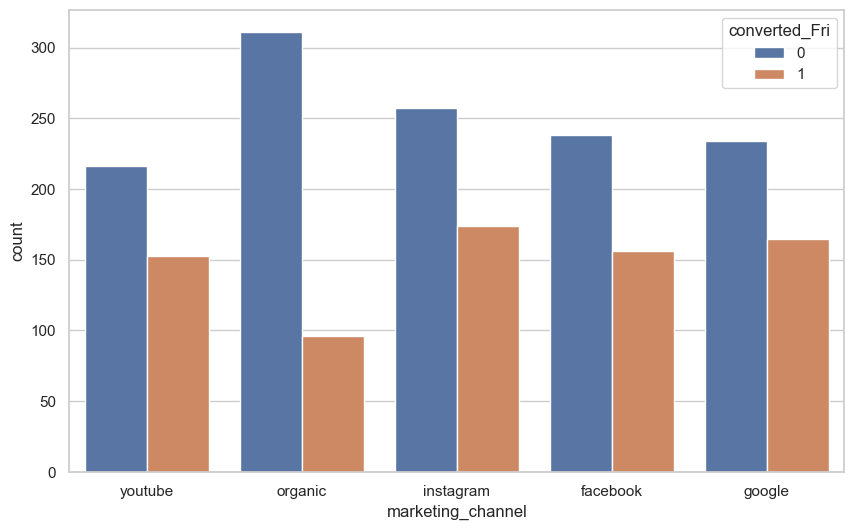

In [500]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marketing_channel', hue='converted_Fri')

In [501]:
df['time_on_site_Week']= df['time_on_site_Mon']+df['time_on_site_Tue']+df['time_on_site_Wed']+df['time_on_site_Thu']+df['time_on_site_Fri']

In [502]:
df['pages_visited_Week']= df['pages_visited_Mon']+df['pages_visited_Tue']+df['pages_visited_Wed']+df['pages_visited_Thu']+df['pages_visited_Fri']

In [503]:
df['TimePerPage']=df['time_on_site_Week']/df['pages_visited_Week']

<Axes: ylabel='Frequency'>

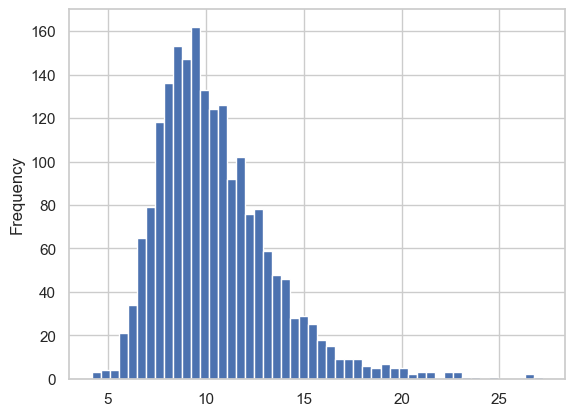

In [504]:
df['TimePerPage'].plot(kind='hist', bins=50)

In [505]:
df_timeperpage = df[df['TimePerPage'] >25]
df_timeperpage

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,F,M,facebook,google,instagram,organic,youtube,time_on_site_Week,pages_visited_Week,TimePerPage
659,659,660,Europe,facebook,F,3,1,2,1,3,...,1,0,1,0,0,0,0,240,9,26.666667
1560,1560,1561,South America,facebook,M,5,0,6,2,0,...,0,1,1,0,0,0,0,264,10,26.400000
1956,1956,1957,Australia,youtube,M,3,1,2,1,4,...,0,1,0,0,0,0,1,245,9,27.222222


<Axes: xlabel='Product_Views_Week', ylabel='count'>

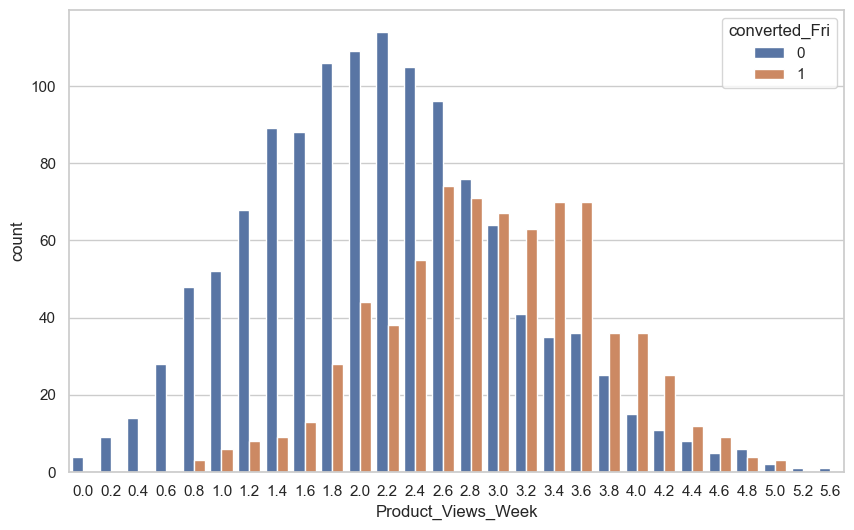

In [555]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product_Views_Week', hue='converted_Fri')

In [507]:
df['avg_rating_Week']= (df['avg_rating_Mon']+df['avg_rating_Tue']+df['avg_rating_Wed']+df['avg_rating_Thu']+df['avg_rating_Fri'])/5
df['avg_price_Week']= (df['avg_price_Mon']+df['avg_price_Tue']+df['avg_price_Wed']+df['avg_price_Thu']+df['avg_price_Fri'])/5

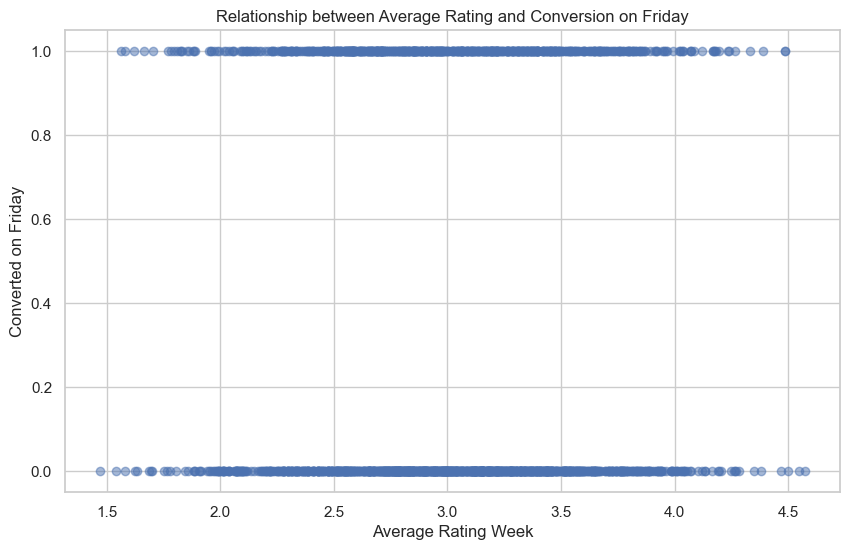

In [564]:
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_rating_Week'], df['converted_Fri'], alpha=0.5)
plt.xlabel('Average Rating Week')
plt.ylabel('Converted on Friday')
plt.title('Relationship between Average Rating and Conversion on Friday')
plt.show()

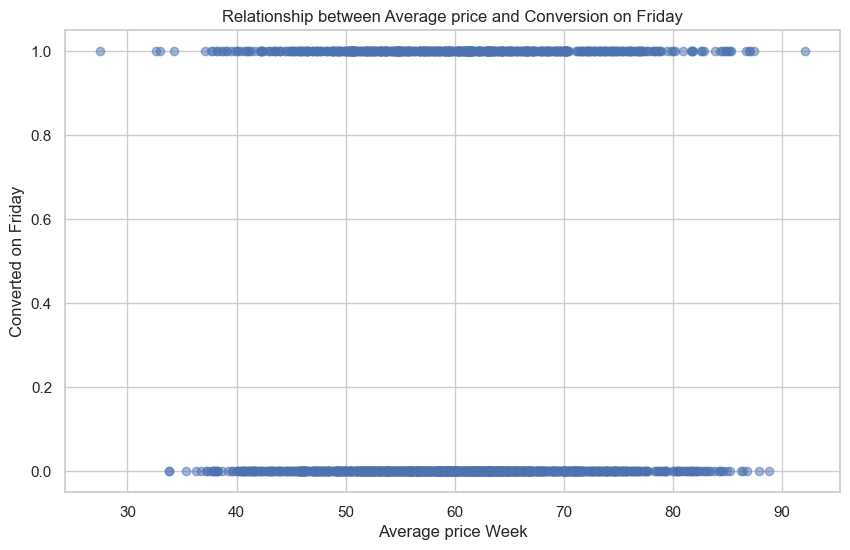

In [565]:
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_price_Week'], df['converted_Fri'], alpha=0.5)
plt.xlabel('Average price Week')
plt.ylabel('Converted on Friday')
plt.title('Relationship between Average price and Conversion on Friday')
plt.show()

In [508]:
df_final= df.drop(['visitor_location','marketing_channel','gender','Unnamed: 0','visitor_id', 'avg_rating_Mon',	'avg_rating_Tue',	'avg_rating_Wed',
'avg_rating_Thu',	'avg_rating_Fri',	'avg_price_Mon',	'avg_price_Tue',	'avg_price_Wed',	'avg_price_Thu',	'avg_price_Fri',	
'time_on_site_Mon',	'time_on_site_Tue',	'time_on_site_Wed',	'time_on_site_Thu',	'time_on_site_Fri',	'pages_visited_Mon',
'pages_visited_Tue',	'pages_visited_Wed',	'pages_visited_Thu',	'pages_visited_Fri'], axis = 1)

In [509]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_views_Mon   2000 non-null   int64  
 1   product_views_Tue   2000 non-null   int64  
 2   product_views_Wed   2000 non-null   int64  
 3   product_views_Thu   2000 non-null   int64  
 4   product_views_Fri   2000 non-null   int64  
 5   converted_Fri       2000 non-null   int64  
 6   Product_Views_Week  2000 non-null   float64
 7   Asia                2000 non-null   int32  
 8   Australia           2000 non-null   int32  
 9   Europe              2000 non-null   int32  
 10  North America       2000 non-null   int32  
 11  South America       2000 non-null   int32  
 12  F                   2000 non-null   int32  
 13  M                   2000 non-null   int32  
 14  facebook            2000 non-null   int32  
 15  google              2000 non-null   int32  
 16  instag

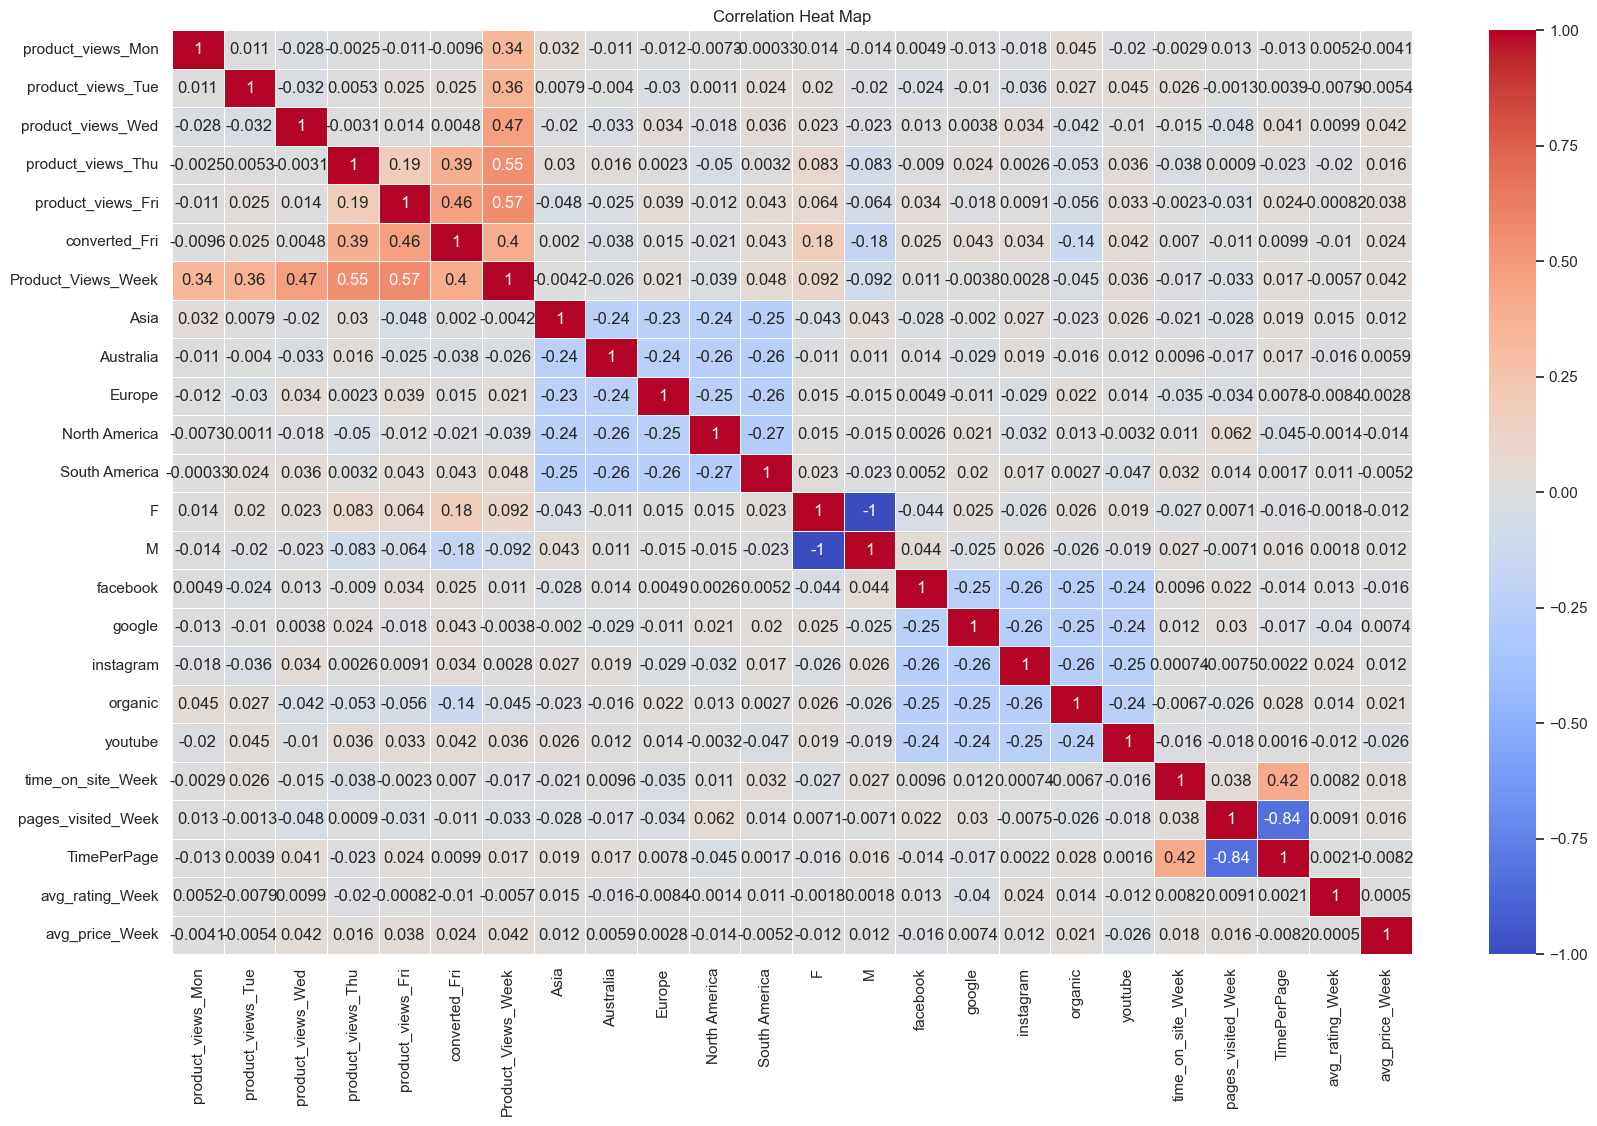

Sorted Correlation for 'Conversion' column:
converted_Fri         1.000000
product_views_Fri     0.464852
Product_Views_Week    0.403973
product_views_Thu     0.388632
F                     0.175387
google                0.042898
South America         0.042508
youtube               0.041956
instagram             0.034388
product_views_Tue     0.025499
facebook              0.024532
avg_price_Week        0.023854
Europe                0.014523
TimePerPage           0.009888
time_on_site_Week     0.007029
product_views_Wed     0.004811
Asia                  0.001952
product_views_Mon    -0.009635
avg_rating_Week      -0.010362
pages_visited_Week   -0.011331
North America        -0.021138
Australia            -0.038468
organic              -0.142359
M                    -0.175387
Name: converted_Fri, dtype: float64


In [510]:
corr_matrix = df_final.corr()

sorted_corr_conversion= corr_matrix['converted_Fri'].sort_values(ascending=False)

# Plotting the heat map
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heat Map")
plt.show()

print("Sorted Correlation for 'Conversion' column:")
print(sorted_corr_conversion)

In [511]:
df_final.columns

Index(['product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'converted_Fri',
       'Product_Views_Week', 'Asia', 'Australia', 'Europe', 'North America',
       'South America', 'F', 'M', 'facebook', 'google', 'instagram', 'organic',
       'youtube', 'time_on_site_Week', 'pages_visited_Week', 'TimePerPage',
       'avg_rating_Week', 'avg_price_Week'],
      dtype='object')

In [512]:
log = LogisticRegression()
log.fit(df[['product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri',
       'Product_Views_Week', 'Asia', 'Australia', 'Europe', 'North America',
       'South America', 'F', 'M', 'facebook', 'google', 'instagram', 'organic',
       'youtube','time_on_site_Week', 'pages_visited_Week', 'TimePerPage',
       'avg_rating_Week', 'avg_price_Week']], df['converted_Fri'])

LogisticRegression()

In [513]:
pred = log.predict(df[['product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri',
       'Product_Views_Week', 'Asia', 'Australia', 'Europe', 'North America',
       'South America', 'F', 'M', 'facebook', 'google', 'instagram', 'organic',
       'youtube','time_on_site_Week', 'pages_visited_Week', 'TimePerPage',
       'avg_rating_Week', 'avg_price_Week']])

In [514]:
print(accuracy_score(pred,df['converted_Fri']))
print(f1_score(pred,df['converted_Fri']))
print(precision_score(pred,df['converted_Fri']))
print(recall_score(pred,df['converted_Fri']))

0.782
0.695104895104895
0.668010752688172
0.7244897959183674


In [515]:
pd.DataFrame([log.feature_names_in_,log.coef_.flatten()]).T

,0,1
0,product_views_Mon,-0.052947
1,product_views_Tue,-0.002456
2,product_views_Wed,-0.038273
3,product_views_Thu,0.357072
4,product_views_Fri,0.451393
5,Product_Views_Week,0.142957
6,Asia,0.09433
7,Australia,-0.252085
8,Europe,-0.051141
9,North America,-0.045074


In [526]:
x = df[['product_views_Thu', 'product_views_Fri','Product_Views_Week', 'Australia',
       'South America', 'F','M','facebook','google','instagram','youtube','organic','TimePerPage','avg_rating_Week']]
y = df['converted_Fri']

In [527]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)

In [528]:
from sklearn.svm import SVC

In [529]:
knn = KNeighborsClassifier()
log = LogisticRegression()
nb = GaussianNB()
svc = SVC(kernel='linear')

In [530]:
knn.fit(x_train, y_train)
log.fit(x_train, y_train)
nb.fit(x_train, y_train)
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [531]:
pred_knn = knn.predict(x_test)
pred_log = log.predict(x_test)
pred_nb = nb.predict(x_test)
pred_sv = svc.predict(x_test)

In [532]:
print(f1_score(pred_knn,y_test))
print(f1_score(pred_log,y_test))
print(f1_score(pred_nb,y_test))
print(f1_score(pred_sv,y_test))

0.7307692307692307
0.6950354609929078
0.697986577181208
0.7123287671232877


In [533]:
print(accuracy_score(pred_knn,y_test))
print(accuracy_score(pred_log,y_test))
print(accuracy_score(pred_nb,y_test))
print(accuracy_score(pred_sv,y_test))

0.79
0.785
0.775
0.79


In [534]:
pred_sv

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [535]:
params_svc = {'kernel':['rbf', 'linear', 'poly','sigmoid']}

randomsearch_svc = RandomizedSearchCV(svc, params_svc, cv=10, n_iter= 15, scoring='f1')
randomsearch_svc.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=SVC(kernel='linear'), n_iter=15,
                   param_distributions={'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   scoring='f1')

In [536]:
randomsearch_svc.best_params_

{'kernel': 'rbf'}

In [548]:
svc = SVC(kernel='rbf')

In [549]:
svc.fit(x_train, y_train)

SVC()

In [550]:
pred_sv = svc.predict(x_test)

In [551]:
print(accuracy_score(pred_sv,y_test))

0.8125


In [553]:
print(f1_score(pred_sv,y_test))

0.7404844290657439


In [552]:
log_pred_prob = log.predict_proba(x_test)

In [538]:
fpr, tpr, tresholds = roc_curve(y_test,log_pred_prob[:,1])

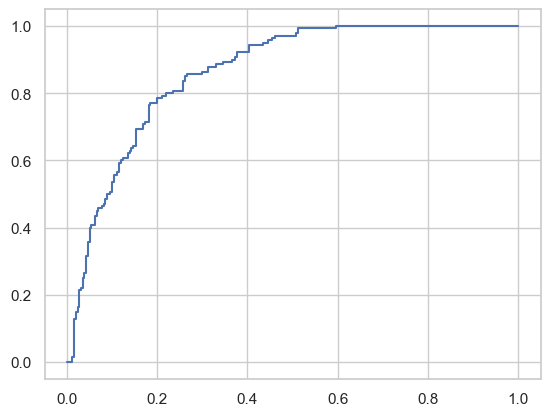

In [539]:
plt.plot(fpr,tpr)

In [540]:
gmeans = np.sqrt(tpr*(1-fpr))

In [541]:
print(tresholds[np.argmax(gmeans)])
print(gmeans[np.argmax(gmeans)])

0.3603730877628268
0.7935176933568209


In [542]:
tresholds

array([1.94087213, 0.94087213, 0.91796557, 0.90211463, 0.8982233 ,
       0.86917144, 0.86574027, 0.85882833, 0.85769608, 0.85192352,
       0.8499675 , 0.83117039, 0.83014322, 0.82912656, 0.82587679,
       0.8165059 , 0.81640049, 0.81231783, 0.81010344, 0.79376642,
       0.79314046, 0.78532665, 0.78385753, 0.76185357, 0.75389672,
       0.74813712, 0.74722624, 0.72843997, 0.72518282, 0.7148756 ,
       0.69818118, 0.69087955, 0.68673744, 0.68255955, 0.67874291,
       0.67741455, 0.67628041, 0.67275856, 0.66557557, 0.66228261,
       0.6513391 , 0.64828227, 0.64077719, 0.62549942, 0.62488746,
       0.61654665, 0.61331239, 0.61024292, 0.60939673, 0.60393662,
       0.59524973, 0.59351974, 0.59009266, 0.58979548, 0.58110116,
       0.57849329, 0.5756524 , 0.57209042, 0.56974347, 0.56808398,
       0.56798224, 0.55625423, 0.54726622, 0.52523028, 0.50392021,
       0.49944498, 0.49931427, 0.49818802, 0.49423114, 0.46689923,
       0.46580041, 0.46504451, 0.44463231, 0.44316126, 0.42703

In [543]:
gmeans

array([0.        , 0.        , 0.        , 0.11883131, 0.11859989,
       0.35579967, 0.35510407, 0.38355623, 0.38280342, 0.40061765,
       0.39982826, 0.45663605, 0.45573272, 0.463266  , 0.46234591,
       0.49126994, 0.49029034, 0.50410404, 0.50309482, 0.54862465,
       0.54752189, 0.5836603 , 0.58248237, 0.6164414 , 0.61519228,
       0.62066076, 0.6181326 , 0.63945375, 0.63814205, 0.64851902,
       0.64718325, 0.6522994 , 0.64959835, 0.65465367, 0.65328839,
       0.6582945 , 0.65691587, 0.66679486, 0.66539256, 0.67510683,
       0.67225224, 0.67703702, 0.67559498, 0.69436507, 0.6928798 ,
       0.70660152, 0.70356236, 0.70805802, 0.70652376, 0.72418958,
       0.72261354, 0.7269536 , 0.72536463, 0.7296695 , 0.72485315,
       0.73333125, 0.73169981, 0.73589297, 0.73424851, 0.73840859,
       0.73675111, 0.7408786 , 0.73753376, 0.76567861, 0.75868597,
       0.76646756, 0.76469128, 0.76854365, 0.76496068, 0.79128148,
       0.78942182, 0.79310213, 0.7855844 , 0.79282497, 0.78708

In [544]:
y_pred_new = []
for i in log_pred_prob[:,1]:
  if i < 0.36829385617577914:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)

In [545]:
print(f1_score(y_pred_new,y_test))

0.7200000000000001


In [546]:
fpr, tpr, tresholds = roc_curve(y_test,y_pred_new)

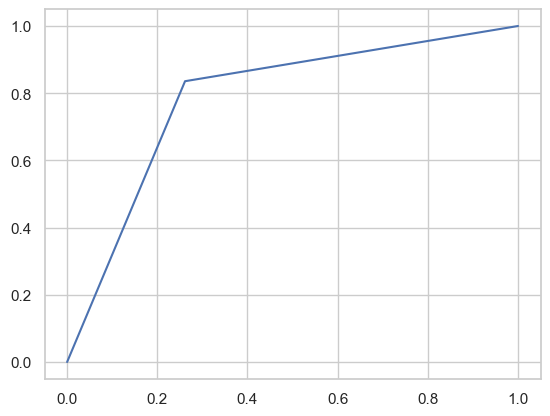

In [547]:
plt.plot(fpr,tpr)

1.	Characteristics of users who convert?
While there are almost equal number of users in terms of gender, it looks like Female visitors have a higher conversion rate. Additionally, south American visitors seem to have the best conversion rate, while North America has the biggest disparity between visitors who convert. It looks like organic users have the least conversion rate, even though they have the second highest count of visitors, only after Instagram. Speaking of, looks like visitors who routed through social media apps have a good conversion rate. it seems that users who view more products (2.5-3/day or about 10 a week) also have a higher chance of converting.
2.	Conduct exploratory analysis on the provided dataset. State your hypothesis based on the insights from your exploration.
As part of the exploratory data analysis, it was observed that Female visitors, specially from South America and those that view a higher number of products have a higher chance of conversion, and that is the hypothesis we are working with today.
As additional insight, it seems that users view less products on Wednesday to Friday as compared to Monday and Tuesday. This is attested by the fact that the time spent on site on Wednesday to Friday is lesser. Organic users account for only 20% of the total visitors, and their conversion rate is also not too great. a few visitors were converted if the average product price in the week was at the lower end (40 and below)
3.	Prepare your data for modelling (i.e., data cleaning and feature engineering).
For the data cleaning portion, no nulls(blank) were observed in any of the fields, hence did not have to deal with those.
It was observed that a few values in Product views for Thursday and Friday were negative. This was assumed to be human error, and those values were converted to their absolute(-ve to +ve)
A few fields were feature engineered(new parameters considered)
a)	Product_Views_Week- average of number of daily products viewed
b)	Time_on_site_week- total time spent on the site in the entire week
c)	Pages_visited_week- total number of pages visited in the week
d)	TimePerPage- Time spent on a page(calculated based on b and c)
e)	Avg_rating_week- avg rating of product viewed in the week
f)	Avg_price_week- avg price of the product viewed in the week
Finally, location, gender and marketing  channel were converted into dummy values- that is they were given 1 and 0 values for each visitor. Eg a female visitors would have “F”=1 and “M”=0
The final dataset that was considered contained the following columns- 
['product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'converted_Fri',
       'Product_Views_Week', 'Asia', 'Australia', 'Europe', 'North America',
       'South America', 'F', 'M', 'facebook', 'google', 'instagram', 'organic',
       'youtube', 'time_on_site_Week', 'pages_visited_Week', 'TimePerPage',
       'avg_rating_Week', 'avg_price_Week']
4.	Modeling and Optimization
The target for this modeling problem was to determine conversion on Friday. We have used logistic methods for conversion, and using coefficient handling(which determines probability of success), the following features were the most important
t- 'product_views_Thu', 'product_views_Fri','Product_Views_Week', 'Australia','South America', 'F','M','facebook','google','instagram','youtube','organic','TimePerPage','avg_rating_Week'
We tried various models including knn, log, sb, svc and found that SVC had the best results both in terms of F1 score and accuracy. We chose not to test the decision tree models because they tend to overfit and are generally time consuming.
To optimize the model the best parameter was rbf and not linear, giving an accuracy score of 81.25%
SVC is the support vector model, and it fits the data into a physical hyper plane, basically dividing the data into categories. It works best when there are only 2 groups to classify, so in this case- conversion or not, hence it is a good model for us. Additionally, an accuracy score of 81% is very good.
Additionally, based on the coefficient handling, it looks like our hypothesis was proven true since these features have a major impact on our model
5.	How to use the Model
This model can be used be used for various purposes:
1.	Targeted marketing- Geographical marketing in Australia and south America
2.	Campaign timing- Run campaigns on Thursday and Friday since visitors view more products on those days. We can also market higher end products to increase sales since there is an increase in conversion.
3.	Budget Allocation- Budget can be allocated more towards either low performing locations/gender to boost their sale or to higher ones to take advantage of the conversion rate.
At the end of the day, the SVC model is a tool to assist decision-making, but it should be part of a larger strategy that includes human expertise, creativity, and understanding of customer behavior. The successful integration of the model into your business process can lead to improved conversion rates and more effective marketing campaigns.
